# 1. Data Exploration:

In [1]:
import warnings
warnings.filterwarnings('ignore')  # use to avoid warning in the code

# a. Load the dataset and perform exploratory data analysis (EDA).

In [2]:
import pandas as pd # import pandas lib using it's short form 

In [3]:
train_data = pd.read_csv(r'Titanic_train.csv',index_col = 0, header =0) # read the training data & make 0th column as index column, 0th row as header

In [4]:
train_data.head() # display top 5 rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv(r'Titanic_test.csv',index_col = 0, header=0) # read the testing data & make 0th column as index column, 0th row as header 

In [6]:
test_data.head() #display top 5 rows

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.columns  # display all the columns of train_data

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test_data.columns   # display all the columns of test_data

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

# Brief information about the given dataset

Now, we have understood that in train_data, Survived column is the Y-parameter i.e. based on the parameters: Pclass, Name, Sex,........, Embarked  we have to predict whether the passenger is survived or not. 

Survived column has 2 values either 0 or 1 which means it's a case of binary classification and we know that Logistic Regression is a supervised machine learning algorithm used for classification (only suitable for binary classification)

train_data is my past data whereas test_data is my current data. We just need to run the ML algorithm(Logistic Regression) on past data, test our model performance on past data and then predict the list of passengers from the current data, who are survived or not 

In [9]:
train_data.info() # gives information about null values and data type of each and every column of training data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test_data.info() # gives information about null values and data type of each and every column of testing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


# b. Examine the features, their types, and summary statistics.

Here, we will examine all the columns of the given dataset, data types of each and every column and descriptive statistics of all the numerical columns.

In [11]:
train_data.dtypes  # data type of each column of training data

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [12]:
test_data.dtypes # data type of each column of testing data

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [13]:
train_data.shape # display no of rows & columns in training data

(891, 11)

In [14]:
test_data.shape # display no of rows & columns in testing data

(418, 10)

In [15]:
train_data[train_data.duplicated()]  #print duplicated rows in training data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


it means, there is no duplicated row in training data

In [16]:
test_data[test_data.duplicated()]  # print duplicated rows in testing data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


it means, there is no duplicated row in testing data

# Let's first discuss the descriptive statistics of training data

In [17]:
train_data.describe() # gives descriptive statistics of numerical columns of training data

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train_data.mean()  # calculate mean for each numerical column of training data (already given above by describe func)

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [19]:
train_data.median() # calculate median for each numerical column of training data 

Survived     0.0000
Pclass       3.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

In [20]:
from scipy import stats
stats.mode(train_data) # calculate mode for each column of training data

ModeResult(mode=array([[0, 3, 'Braund, Mr. Owen Harris', 'male', 24.0, 0, 0, '347082',
        8.05, nan, 'S']], dtype=object), count=array([[549, 491,   1, 577,  30, 608, 678,   7,  43, 687, 644]]))

In [21]:
train_data.std() # calculate standard deviation for each numerical column of training data (already given above by describe func)

Survived     0.486592
Pclass       0.836071
Age         14.526497
SibSp        1.102743
Parch        0.806057
Fare        49.693429
dtype: float64

brief interpretation: for training data, in all numerical columns (except Pclass), mean>median>mode which means data is right skewed i.e. majority of data lies in the left side of the mean. Whereas in Pclass, mean<median< mode which means data is left skewed i.e. majority of data lies in the right side of the mean. 

If std is more => data is more spread about the mean i.e data points are more far away from the mean. Clearly, for Fare, data is most spread about the mean and for Survived data is least spread about the mean

# Now, discuss the descriptive statistics of testing data

In [22]:
test_data.describe() # gives descriptive statistics of numerical columns of testing data

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
test_data.mean()  # calculate mean for each numerical column of testing data (already given above by describe func)

Pclass     2.265550
Age       30.272590
SibSp      0.447368
Parch      0.392344
Fare      35.627188
dtype: float64

In [24]:
test_data.median() # calculate median for each numerical column of testing data 

Pclass     3.0000
Age       27.0000
SibSp      0.0000
Parch      0.0000
Fare      14.4542
dtype: float64

In [25]:
stats.mode(test_data) # calculate mode for each column of testing data

ModeResult(mode=array([[3, 'Kelly, Mr. James', 'male', 21.0, 0, 0, 'PC 17608', 7.75, nan,
        'S']], dtype=object), count=array([[218,   1, 266,  17, 283, 324,   5,  21, 327, 270]]))

In [26]:
test_data.std() # calculate standard deviation for each numerical column of testing data (already given above by describe func)

Pclass     0.841838
Age       14.181209
SibSp      0.896760
Parch      0.981429
Fare      55.907576
dtype: float64

brief interpretation: For testing data, in all numerical columns (except Pclass), mean>median>mode which means data is right skewed i.e. majority of data lies in the left side of the mean. Whereas in Pclass, mean<median< mode which means data is left skewed i.e. majority of data lies in the right side of the mean.

If std is more => data is more spread about the mean i.e data points are more far away from the mean. Clearly, for Fare, data is most spread about the mean and for Pclass, data is least spread about the mean

In [27]:
train_data.isnull().sum() # no of null values in each column of training data

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [28]:
test_data.isnull().sum() # no of null values in each column  of testing data

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

# we can treat null values using Imputation technique. 

Imputation technique is used for replacing the missing data with some substitute values to retain most of the data/information of the dataset. These substitute values can be either mean, median or mode. 

we can treat null values of columns: Age, Cabin for training and testing data using mode

In [29]:
train_data['Age'].mode() # calculate mode of Age column for training data

0    24.0
Name: Age, dtype: float64

In [30]:
train_data['Cabin'].mode()  # calculate mode of Cabin column for training data

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [31]:
test_data['Age'].mode() # calculate mode of Age column for testing data

0    21.0
1    24.0
Name: Age, dtype: float64

In [32]:
test_data['Cabin'].mode() # calculate mode of Cabin column for testing data

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [33]:
for x in ['Age','Cabin']:  #x can be any column like Age, Cabin
    train_data[x].fillna(train_data[x].mode()[0], inplace = True) #fill missing values of these columns(for training data) with mode
    test_data[x].fillna(test_data[x].mode()[0], inplace = True) #fill missing values of these columns(for testing data) with mode
    

In [34]:
train_data.isnull().sum() # we can see no. of null values in columns Age, Cabin are 0  (for training data)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [35]:
test_data.isnull().sum() # we can see no. of null values in columns Age, Cabin are 0 (for testing data)

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [36]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True) #fill categorical missing data in Embarked column with mode (for training data)

In [37]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True) #fill numerical missing data in Fare column with mean (for testing data)

In [38]:
train_data.isnull().sum() # there is no null value in our training data

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [39]:
test_data.isnull().sum() # there is no null value in our testing data

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

we will plot histogram, boxplot for numerical column whereas plot bar  graph for categorical column

# Let's first visualize the training data

In [40]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

<AxesSubplot:>

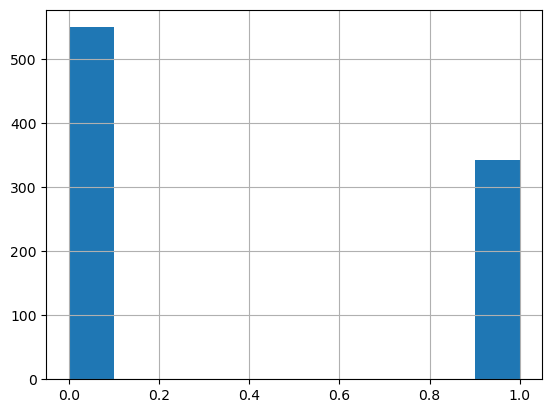

In [41]:
train_data['Survived'].hist() #plot histogram 

Range of Survived: 0.0 to 1.0 => normally distributed data i.e.  no outlier in the dataset 

<AxesSubplot:>

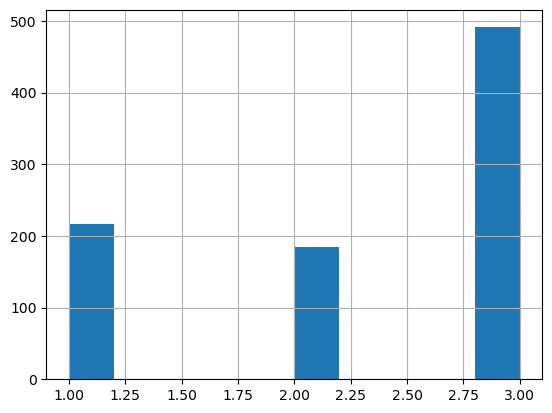

In [42]:
train_data['Pclass'].hist()

Range of Pclass Column: 1.00 - 3.00. Normally distributed data i.e. no outlier in the dataset

<AxesSubplot:>

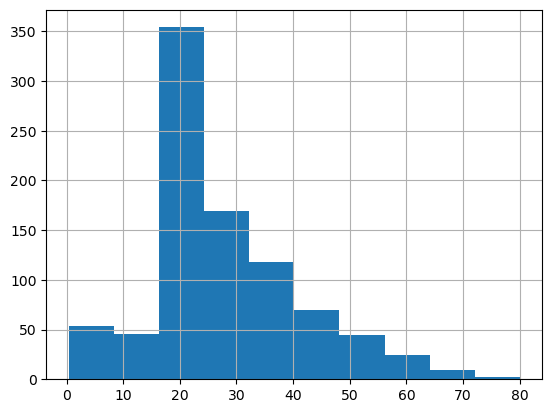

In [43]:
train_data['Age'].hist()

Range of Age column:0-80. Right skewed data. Outliers can be seen within the range (70-80)

<AxesSubplot:>

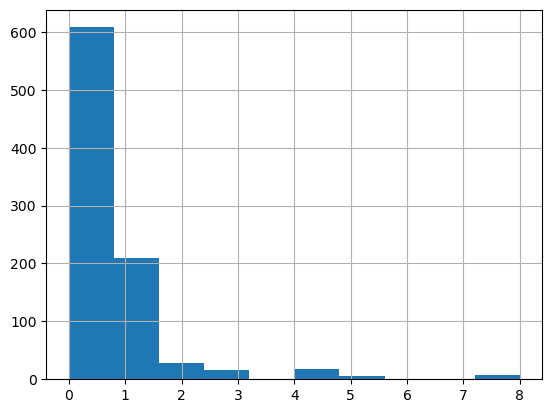

In [44]:
train_data['SibSp'].hist()

Range of SibSp column:0-8. Right skewed data. Outliers can be seen within the range (5-6, 7-8)

<AxesSubplot:>

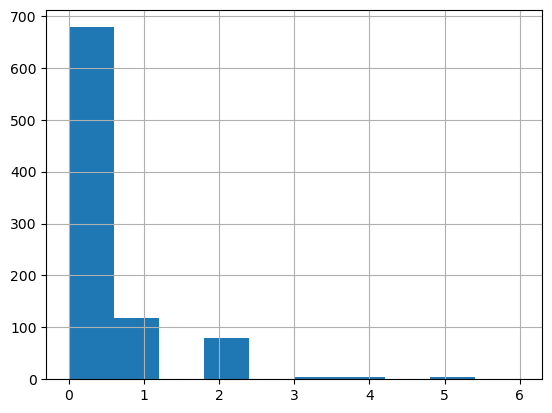

In [45]:
train_data['Parch'].hist()

Range of Parch column:0-6. Right skewed data. Outliers can be seen within the range (3-4, 5-6)

<AxesSubplot:>

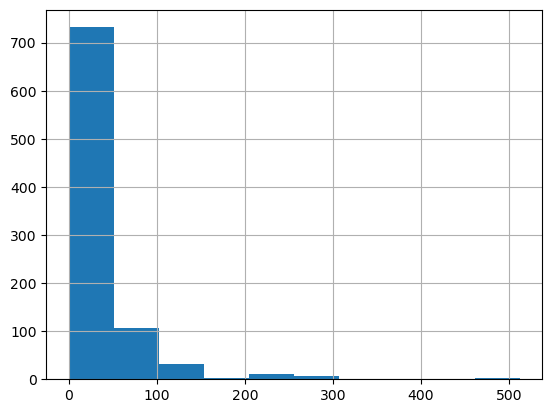

In [46]:
train_data['Fare'].hist()

Range of Fare column:0-500. Right skewed data. Outliers can be seen within the range (200-300, 450-500)

In [47]:
import matplotlib.pyplot as plt #boxplot function is available in this lib 

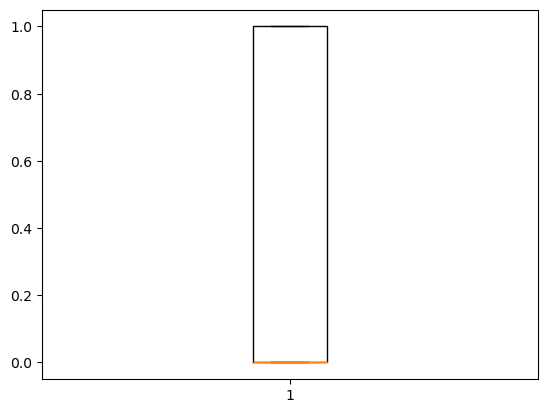

In [48]:
plt.boxplot(train_data['Survived']) #plot boxplot for Survived column
plt.show()

Range of Survived: 0.0 - 1.0. Normally distributed data i.e. no outlier in the data. IQR(Inter Quartile Range) = 1.0 - 0.0 = 1.0

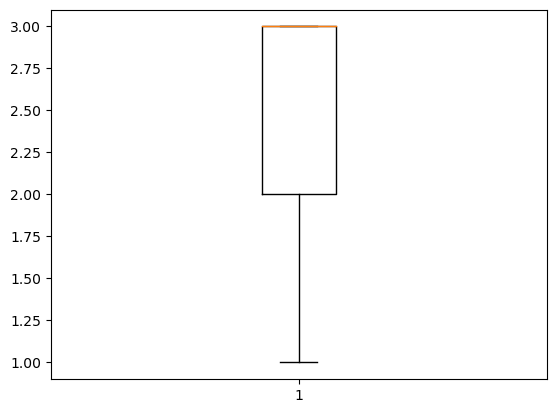

In [49]:
plt.boxplot(train_data['Pclass']) 
plt.show()

Range of Pclass: 1.00 - 3.00. Normally distributed data i.e. no outlier in the data. IQR(Inter Quartile Range) = 3.00 - 2.00 = 1.00


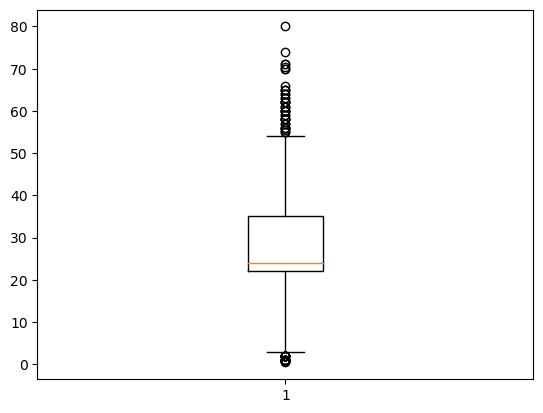

In [50]:
plt.boxplot(train_data['Age'])
plt.show()

Range of Age: 0-80. Right skewed data. IQR(Inter Quartile Range) = 35-25=10 (approx). Range from 0-1 & 55-75 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. Range from 78-80 : 1 outlier and we can remove it from the dataset

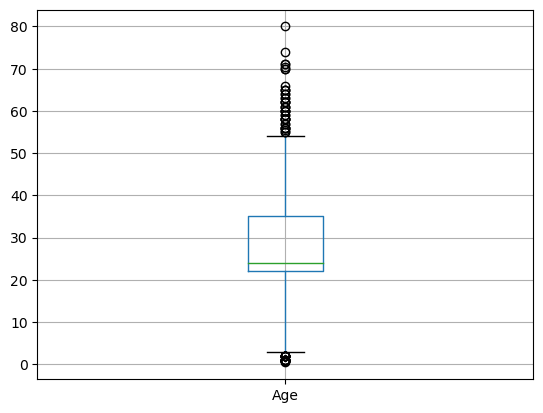

In [51]:
train_data.boxplot(column='Age')  # boxplot for column Age (another way of writing code for plotting the boxplot)
plt.show()

# Treat outlier in column Age: only one point at 80

In [52]:
train_data.drop(train_data[train_data['Age'] > 78].index,axis=0,inplace=True) # remove one outlier above 78

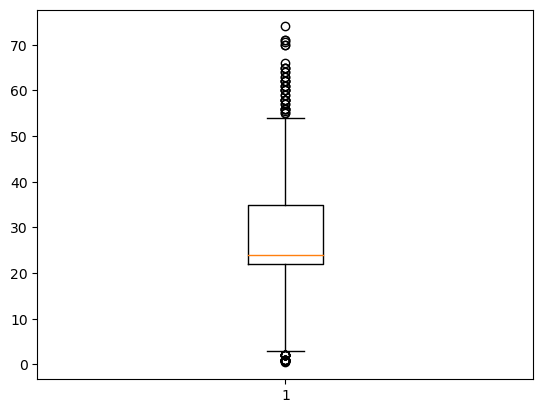

In [53]:
plt.boxplot(train_data['Age']) # one outlier above 78 has been removed now
plt.show()

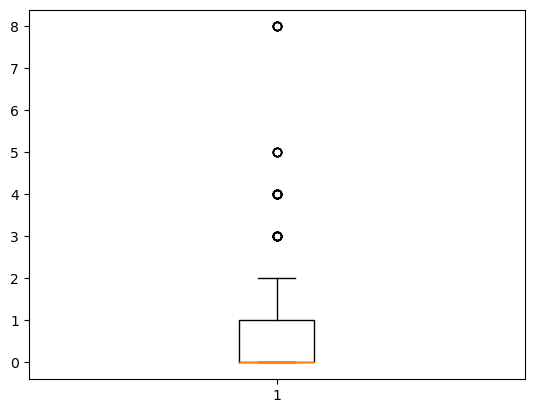

In [54]:
plt.boxplot(train_data['SibSp'])
plt.show()

Range of SibSp: 0-8. Right skewed data. IQR(Inter Quartile Range) = 1-0 = 1. Range from 3-5: 3 outliers but still they are relatively closer as compared to the one outlier at 8. So, we should remove outlier given at 8

# Treat outlier in column SibSp: only one point at 8

In [55]:
train_data.drop(train_data[train_data['SibSp'] > 7].index,axis=0,inplace=True) # remove one outlier above 7

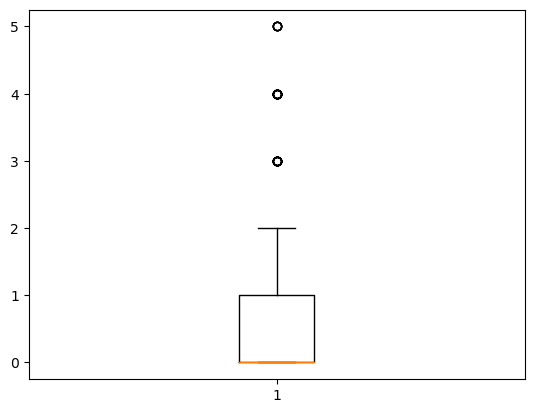

In [56]:
plt.boxplot(train_data['SibSp']) # one outlier above 7 has been removed now 
plt.show()

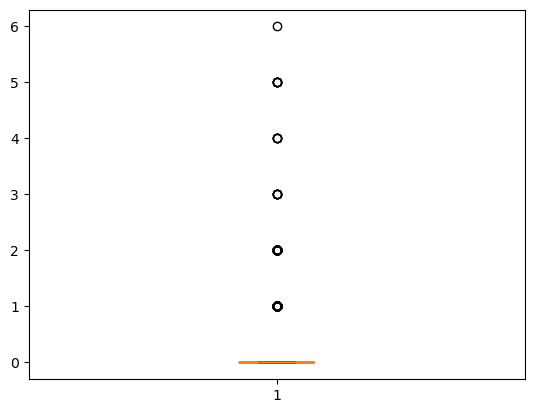

In [57]:
plt.boxplot(train_data['Parch'])
plt.show()

Range of Parch: 0-6. Right skewed data. IQR(Inter Quartile Range) = 0 . Range from 1-6: 6 outliers, however all these values can be possible, so, we are not considering them as outliers

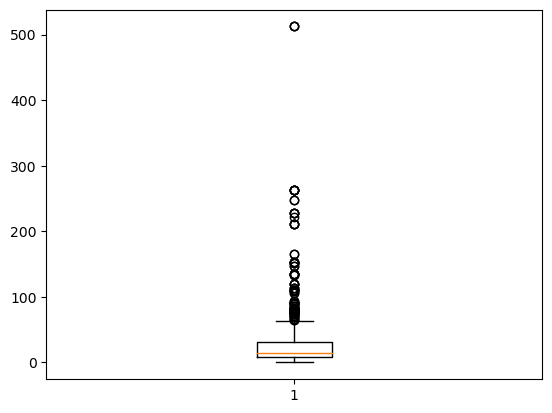

In [58]:
plt.boxplot(train_data['Fare'])
plt.show()

Range of Fare: 0-500. Right skewed data. IQR(Inter Quartile Range) = 1-0 = 1 (approx) . Range from 70-300 is very dense , so, can't be considered as outliers. There is one outlier above 500 which should be removed from the dataset

# Treat outlier in column Fare: only one point above 500

In [59]:
train_data.drop(train_data[train_data['Fare'] > 500].index,axis=0,inplace=True) # remove one outlier above 500

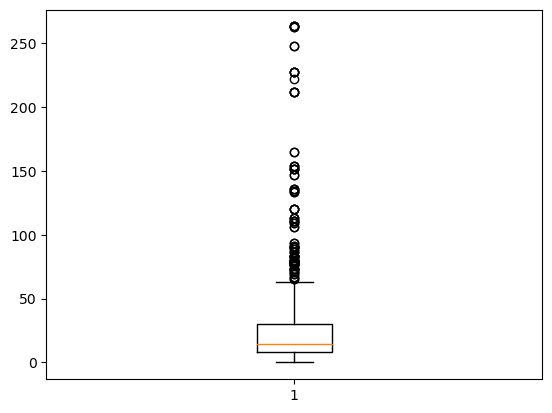

In [60]:
plt.boxplot(train_data['Fare']) # one outlier above 500 has been removed now 
plt.show()

# Let's plot bar graph for categorical columns of training data 

In [61]:
train_data.dtypes  #to identify categorical columns

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Categorical Columns: Name, Sex, Ticket, Cabin, Embarked

Braund, Mr. Owen Harris                     1
Leitch, Miss. Jessie Wills                  1
Taussig, Miss. Ruth                         1
Jarvis, Mr. John Denzil                     1
Frolicher-Stehli, Mr. Maxmillian            1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 880, dtype: int64

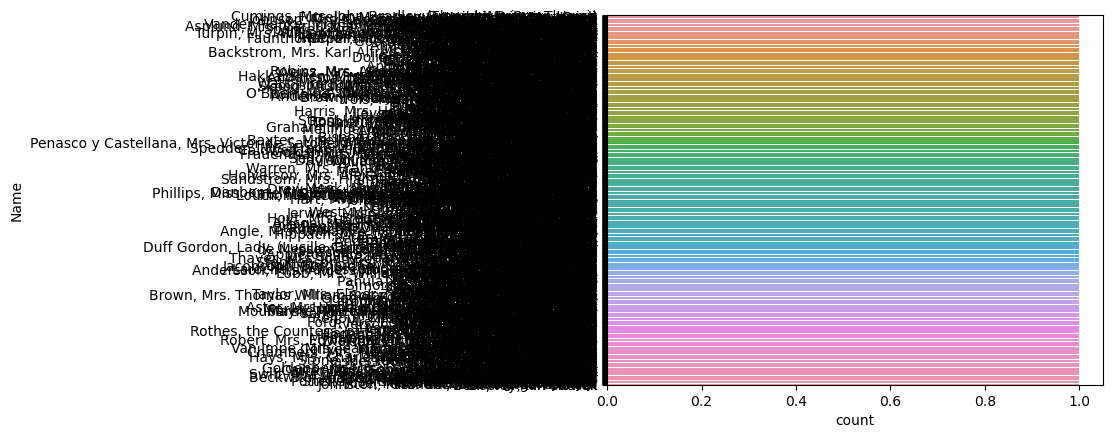

In [62]:
import seaborn as sns
sns.countplot(data=train_data,y=train_data['Name'])  # plot bar graph showing the count or frequency of each element in Name column
pd.value_counts(train_data['Name'])  # it will give exact number of times each element occuring in Name column

for getting clear visuals, we need to define the range of data to be displayed using order parameter inside countplot function 

Braund, Mr. Owen Harris                     1
Leitch, Miss. Jessie Wills                  1
Taussig, Miss. Ruth                         1
Jarvis, Mr. John Denzil                     1
Frolicher-Stehli, Mr. Maxmillian            1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 880, dtype: int64

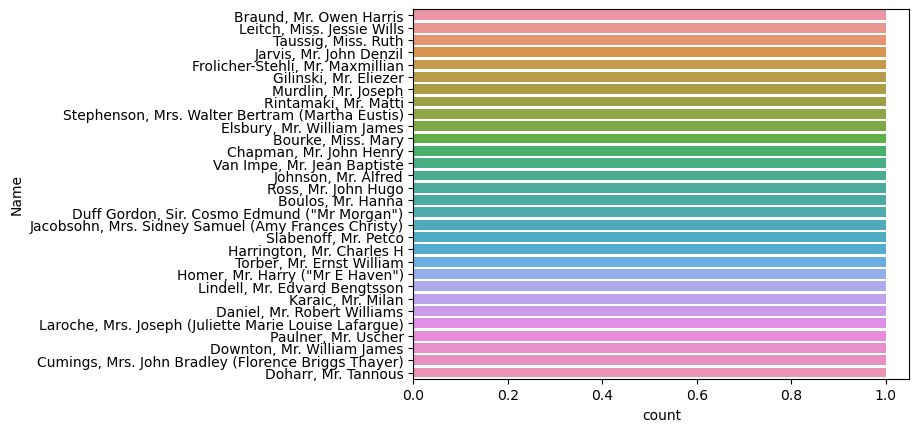

In [63]:
sns.countplot(data=train_data, y=train_data['Name'], order=pd.value_counts(train_data['Name']).iloc[:30].index) # plot bar graph showing the count of each element in Name column from row 1 to 29
pd.value_counts(train_data['Name'])  # it will give exact number of times each element occuring in Name column


insight of Name column: each name is repeating once from row 1 to 29

male      570
female    310
Name: Sex, dtype: int64

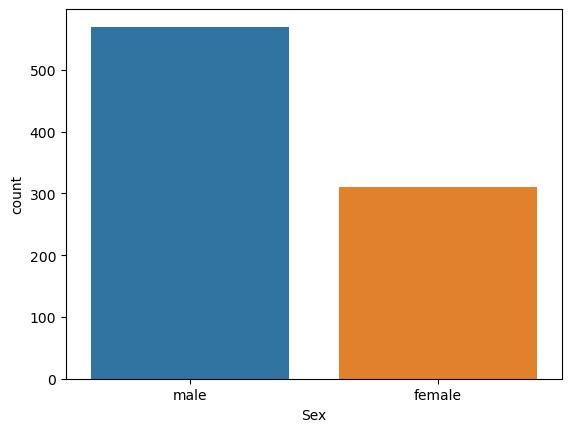

In [64]:
sns.countplot(data=train_data,x=train_data['Sex'])  # plot bar graph showing the count or frequency of each element in Sex column
pd.value_counts(train_data['Sex'])  # it will give exact number of times each element occuring in Sex column

insight of Sex column: no. of males are more than females almost double

1601        7
347082      7
3101295     6
CA 2144     6
347088      6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 678, dtype: int64

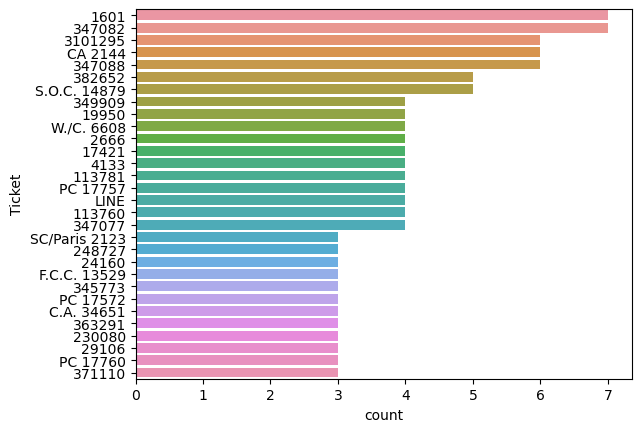

In [65]:
sns.countplot(data=train_data, y=train_data['Ticket'], order=pd.value_counts(train_data['Ticket']).iloc[:30].index) # plot bar graph showing the count of each element in Ticket column from row 1 to 29
pd.value_counts(train_data['Ticket'])  # it will give exact number of times each element occuring in Ticket column

B96 B98        683
G6               4
C23 C25 C27      4
F2               3
D                3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 145, dtype: int64

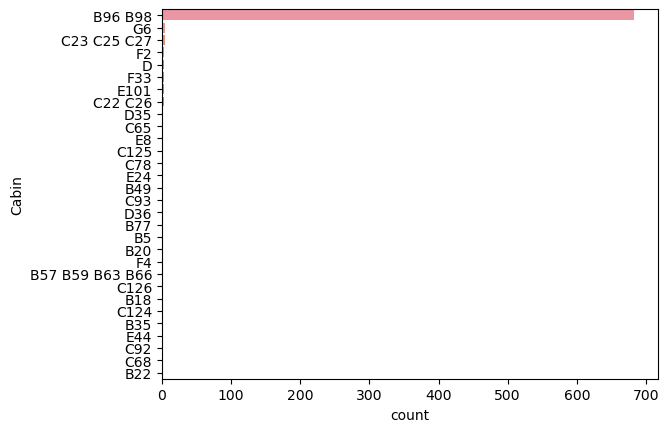

In [66]:
sns.countplot(data=train_data, y=train_data['Cabin'], order=pd.value_counts(train_data['Cabin']).iloc[:30].index) # plot bar graph showing the count of each element in Cabin column from row 1 to 29
pd.value_counts(train_data['Cabin'])  # it will give exact number of times each element occuring in Cabin column

S    638
C    165
Q     77
Name: Embarked, dtype: int64

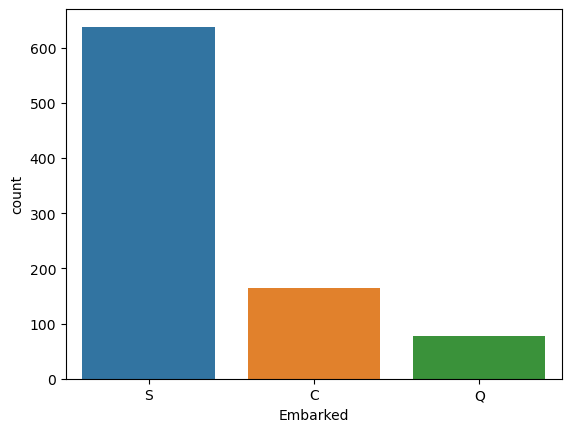

In [67]:
sns.countplot(data=train_data, x=train_data['Embarked']) # plot bar graph showing the count of each element in Embarked column 
pd.value_counts(train_data['Embarked'])  # it will give exact number of times each element occuring in Embarked column

# Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

Violin plot is similar to boxplot. A violin plot shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

<AxesSubplot:xlabel='Survived'>

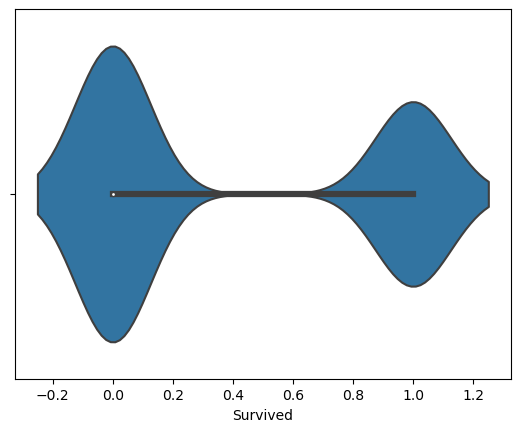

In [68]:
import seaborn as sns
sns.violinplot(x = train_data['Survived']) # it will show the distribution of data inside column Survived using violinplot func. 

Brief interpretation: in wider region, value occur more frequently whereas in narrower region value occur less frequently. Therefore, 0.0 and 1.0 occur most frequently. Hence, mode of Survived = 0.0,1.0

We can see a dark line in this plot in which a white dot indicates median and end points of this dark line are Q1 and Q3

Median = 0.0 (approx), Q1=0.0, Q3= 1.0, IQR= Q3-Q1 = 1.0

<AxesSubplot:xlabel='Pclass'>

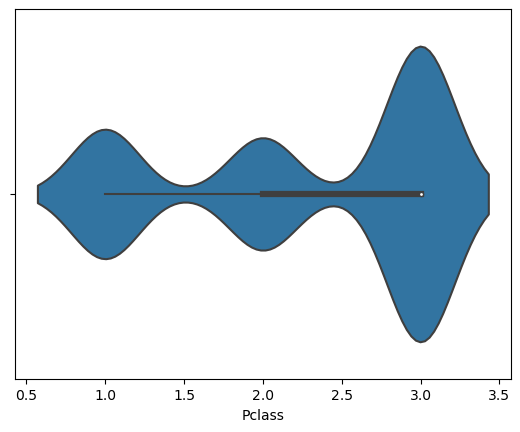

In [69]:
sns.violinplot(x = train_data['Pclass']) # it will show the distribution of data inside column Pclass using violinplot func. 

<AxesSubplot:xlabel='Age'>

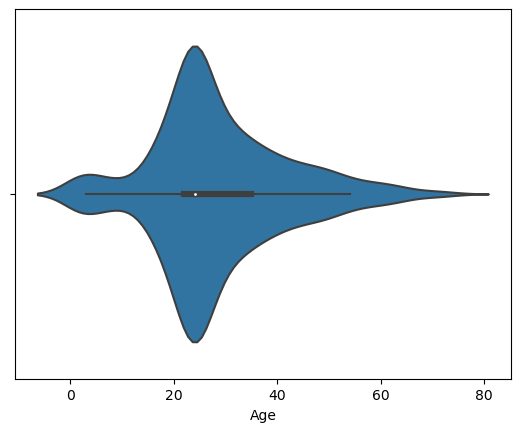

In [70]:
sns.violinplot(x = train_data['Age']) # it will show the distribution of data inside column Age using violinplot func. 

<AxesSubplot:xlabel='SibSp'>

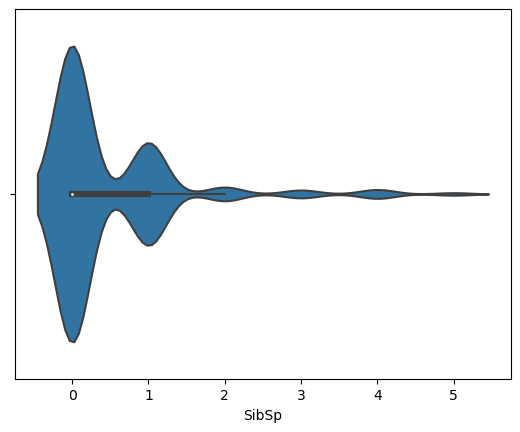

In [71]:
sns.violinplot(x = train_data['SibSp']) # it will show the distribution of data inside column SibSp using violinplot func. 

<AxesSubplot:xlabel='Parch'>

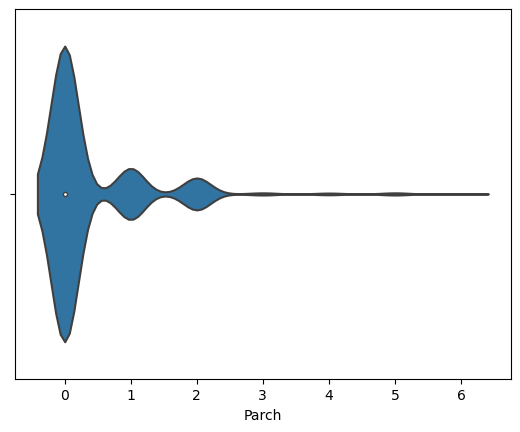

In [72]:
sns.violinplot(x = train_data['Parch']) # it will show the distribution of data inside column Parch using violinplot func. 

<AxesSubplot:xlabel='Fare'>

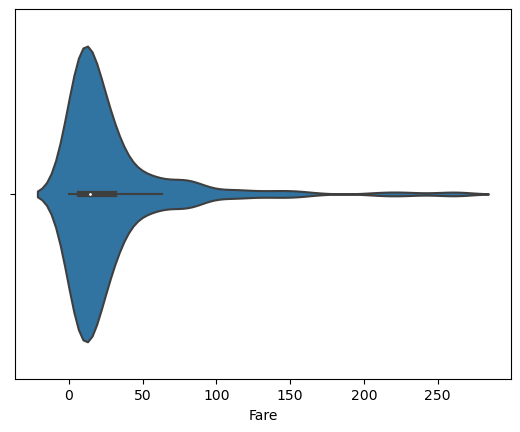

In [73]:
sns.violinplot(x = train_data['Fare']) # it will show the distribution of data inside column Fare using violinplot func. 

# Analyze any patterns or correlations observed in the data.

Let's apply heatmap over this training data to get the value of correlation between two variables

<AxesSubplot:>

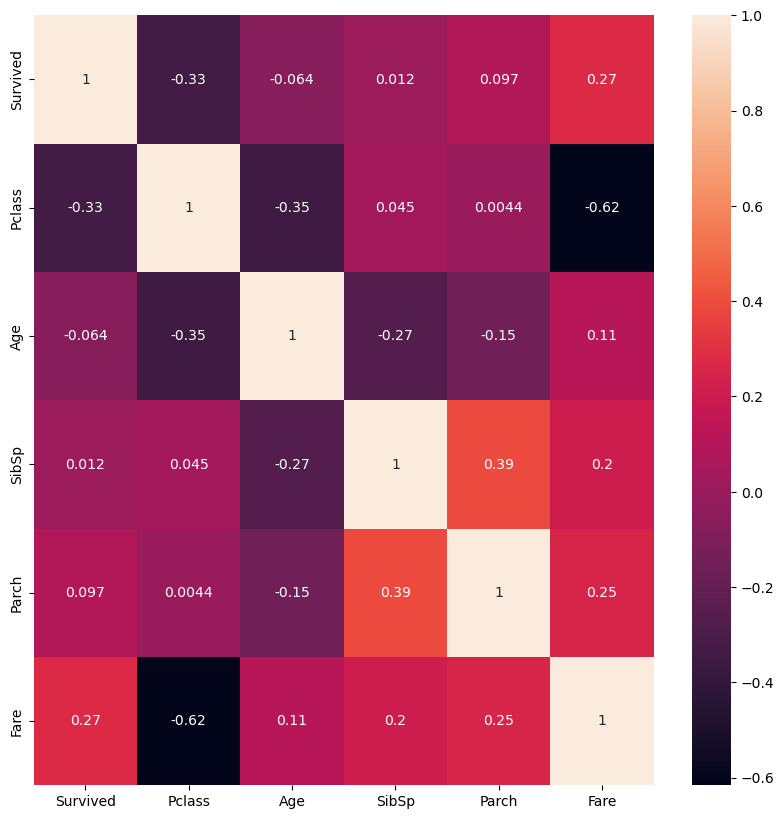

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))  #specify size of heatmap
sns.heatmap(train_data.corr(),annot=True) #create heatmap (parameter annot is used to display the correlation values, bidefault it is False, so, we have to pass True)

Fare is the most contributing element in deciding whether the passenger will survive or not because correlation value between Fare and Survived is 0.27 which is maximum value shown in this heatmap. Also, they have positive correlation (both variable varies in the same direction)

any value < 0.1 is considered as no-correlation. Therefore, variables like SibSp, Parch have no correlation with Survived. Remaining variables like Pclass, Age have negative correlation with Survived (Negative correlation means both variable varies in opposite direction)

# Now, Let's visualize the testing data

In [75]:
test_data.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

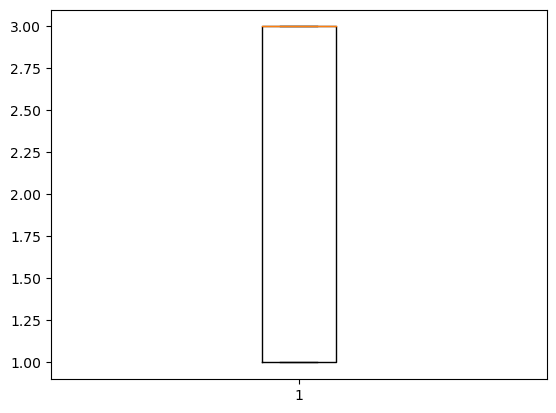

In [76]:
plt.boxplot(test_data['Pclass']) 
plt.show()

Range of Pclass: 1.00 - 3.00. Normally distributed data i.e. no outlier in the data. IQR(Inter Quartile Range) = 3.00 - 1.00 = 2.00

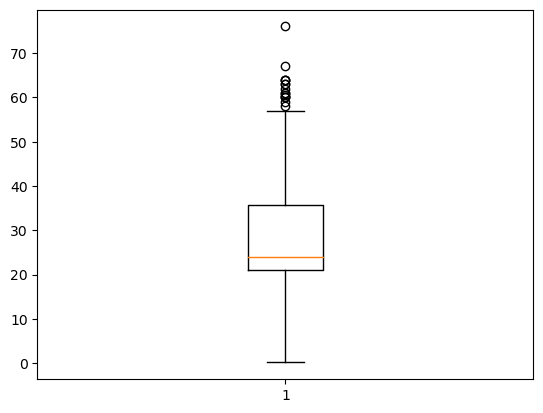

In [77]:
plt.boxplot(test_data['Age'])
plt.show()

Range of Age: 0-70. Right skewed data. IQR(Inter Quartile Range) = 35-20=15 (approx). Range from 55-70 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There is one value above 70 which is 100% outlier so, we can remove it from the dataset

# Treat outlier in column Age: only one point above 70

In [78]:
test_data.drop(test_data[test_data['Age'] > 70].index,axis=0,inplace=True) # remove one outlier above 70

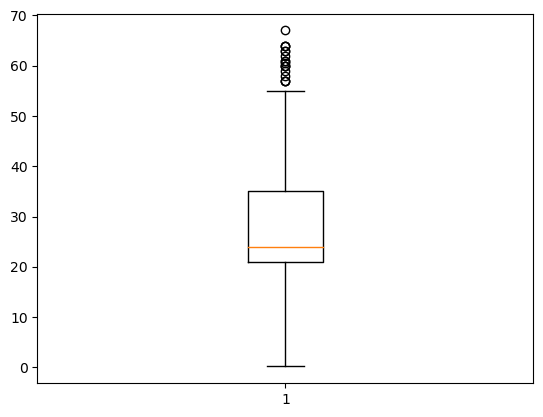

In [79]:
plt.boxplot(test_data['Age']) # one outlier above 70 has been removed now
plt.show()

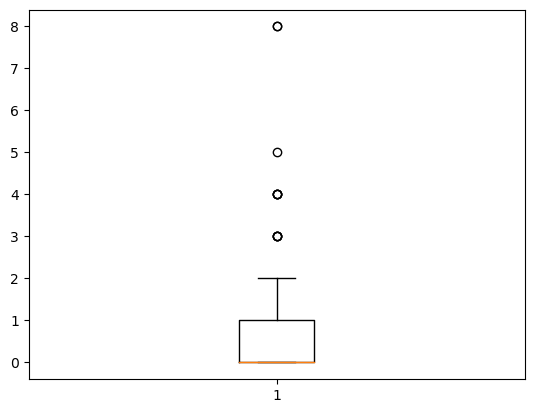

In [80]:
plt.boxplot(test_data['SibSp'])
plt.show()

Range of SibSp: 0-8. Right skewed data. IQR(Inter Quartile Range) = 1-0 = 1. Range from 3-5: 3 outliers but still they are relatively closer as compared to the one outlier at 8. So, we should remove outlier given at 8

# Treat outlier in column SibSp: only one point at 8

In [81]:
test_data.drop(test_data[test_data['SibSp'] > 7].index,axis=0,inplace=True) # remove one outlier above 7

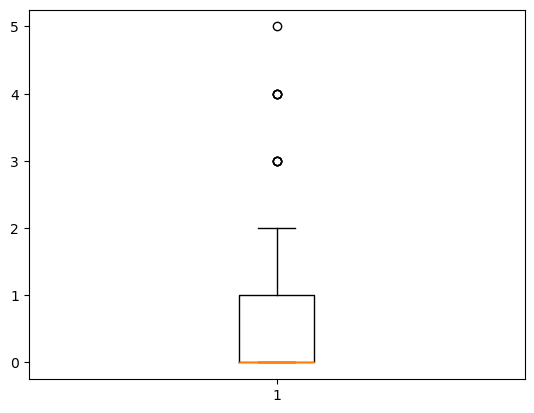

In [82]:
plt.boxplot(test_data['SibSp']) # one outlier above 7 has been removed now 
plt.show()

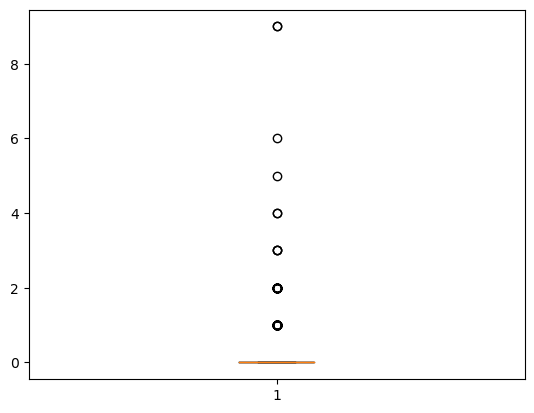

In [83]:
plt.boxplot(test_data['Parch'])
plt.show()

Range of Parch: 0-8. Right skewed data. IQR(Inter Quartile Range) = 0 . Range from 1-6: 6 outliers, however all these values can be possible, so, we are not considering them as outliers. However, one point above 8 is very extreme point and should be treated as outlier and hence must be removed from the dataset

# Treat outlier in column Parch: only one point above 8

In [84]:
test_data.drop(test_data[test_data['Parch'] > 8].index,axis=0,inplace=True) # remove one outlier above 8

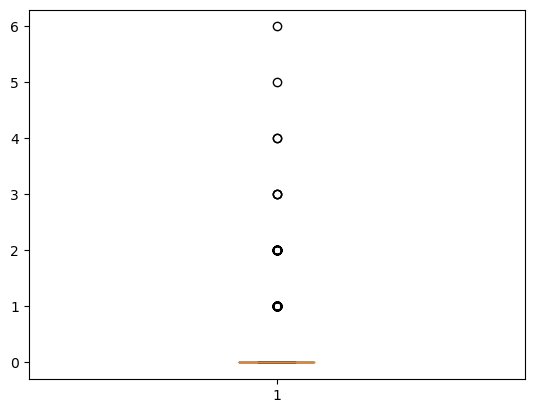

In [85]:
plt.boxplot(test_data['Parch'])  # one outlier above 8 has been removed now
plt.show()

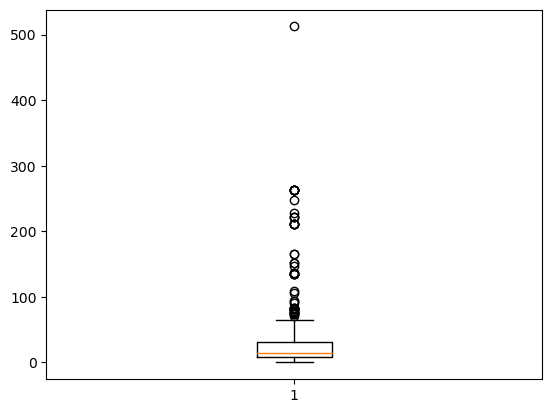

In [86]:
plt.boxplot(test_data['Fare'])
plt.show()

Range of Fare: 0-500. Right skewed data. IQR(Inter Quartile Range) = 1-0 = 1 (approx) . Range from 70-300 is very dense , so, can't be considered as outliers. There is one outlier above 500 which should be removed from the dataset

# Treat outlier in column Fare: only one point above 500

In [87]:
test_data.drop(test_data[test_data['Fare'] > 500].index,axis=0,inplace=True) # remove one outlier above 500

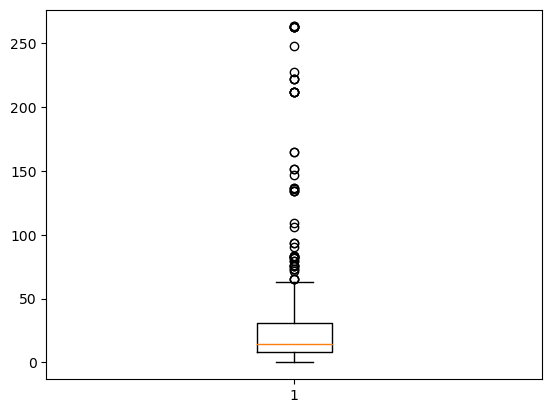

In [88]:
plt.boxplot(test_data['Fare']) # one outlier above 500 has been removed now 
plt.show()

# Let's apply heatmap over this testing data to get the value of correlation between two variables

<AxesSubplot:>

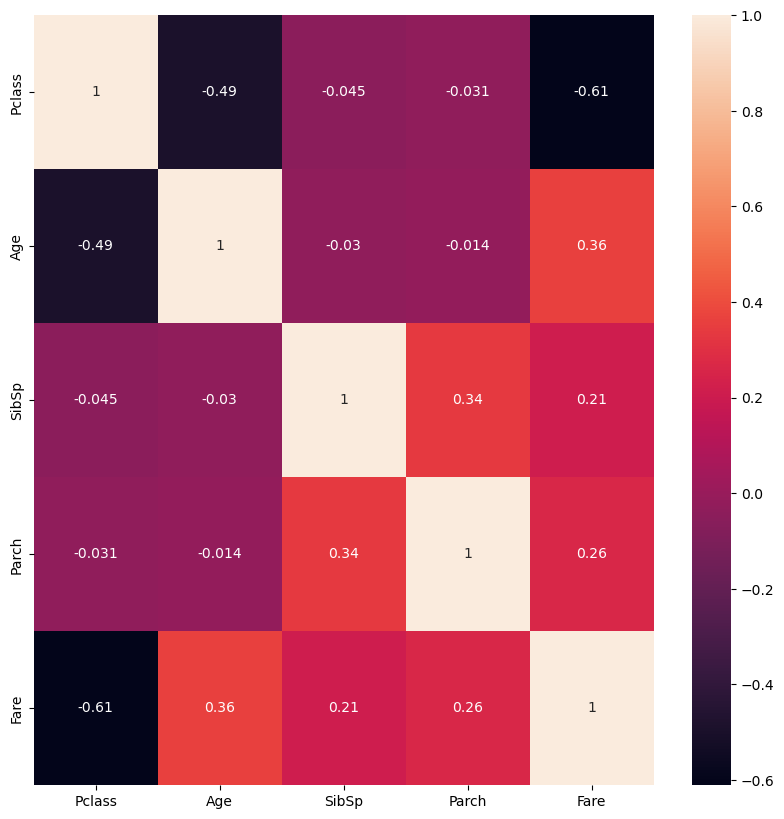

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))  #specify size of heatmap
sns.heatmap(test_data.corr(),annot=True) #create heatmap (parameter annot is used to display the correlation values, bidefault it is False, so, we have to pass True)

With respect to Fare, Age is the most related parameter with correlation value of 0.36. Also, they have positive correlation (both variable varies in the same direction)

any value < 0.1 is considered as no-correlation. (Negative correlation means both variable varies in opposite direction)

Brief interpretation: A machine learning algorithm can not run if there are missing values, outliers in the dataset. We can treat missing values using Imputation technique. Imputation technique is used for replacing the missing data with some substitute values to retain most of the data/information of the dataset. These substitute values can be either mean, median or mode. After treating missing values, our next goal is to remove the outliers and for it, outlier detection is needed which is done by boxplot. Once we remove outliers, our data becomes normal distributed i.e. symmetrical about the mean and now, we are in the position to train our machine learning model successfully. Through IQR, we will understand how middle 50% data is spread and heatmap will help us to understand whether our variables have good correlation or not which ultimately helps us in getting close to the future predictions especially when we are working on Time Series data

# 2. Data Preprocessing:

# a. Handle missing values (e.g., imputation).
already completed for both training and testing data in - (1. Data Exploration)

# b. Encode categorical variables.

Conversion of Categorical Data into Numerical data

In [90]:
train_data.dtypes  # Categorical Columns: Name, Sex, Ticket, Cabin, Embarked 

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [91]:
test_data.dtypes # Categorical Columns: Name, Sex, Ticket, Cabin, Embarked

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

ML algorithm can not run if there is a missing value, outliers, and categorical data in the dataset. Because Machine understands only numbers. So, we need to convert categorical data into numberical data and for this conversion, we have 2 techniques: dummy variable and label encoding.

# Let's convert categorical columns of training data into Numerical using Label Encoding

In [92]:
colname = ['Name','Sex','Ticket','Cabin','Embarked'] # list having only categorical columns

In [93]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder function from preprocessing sublibrary
le=LabelEncoder()                              # save LabelEncoder function in a variable le
for x in colname:                             # x can be any column like Name, Sex etc. 
    train_data[x]=le.fit_transform(train_data[x]) # it assigns numbers to all values of categorical column

In [94]:
train_data.head() #display top 5 rows 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,107,1,22.0,1,0,522,7.2500,45,2
2,1,1,188,0,38.0,1,0,594,71.2833,79,0
3,1,3,351,0,26.0,0,0,666,7.9250,45,2
4,1,1,270,0,35.0,1,0,49,53.1000,53,2
5,0,3,15,1,35.0,0,0,471,8.0500,45,2


Now, every column has become numerical column which means we can run machine learning algorithm on this dataset

# Let's convert categorical columns of testing data into Numerical using Label Encoding

In [95]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder function from preprocessing sublibrary
le=LabelEncoder()                              # save LabelEncoder function in a variable le
for x in colname:                             # x can be any column like Name, Sex etc. 
    test_data[x]=le.fit_transform(test_data[x]) # it assigns numbers to all values of categorical column

In [96]:
test_data.head() #display top 5 rows 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,204,1,34.5,0,0,151,7.8292,14,1
893,3,397,0,47.0,1,0,220,7.0000,14,2
894,2,267,1,62.0,0,0,72,9.6875,14,1
895,3,402,1,27.0,0,0,146,8.6625,14,2
896,3,176,0,22.0,1,1,137,12.2875,14,2


Now, every column has become numerical column which means we can run machine learning algorithm on this dataset

# Plot correlation matrix 

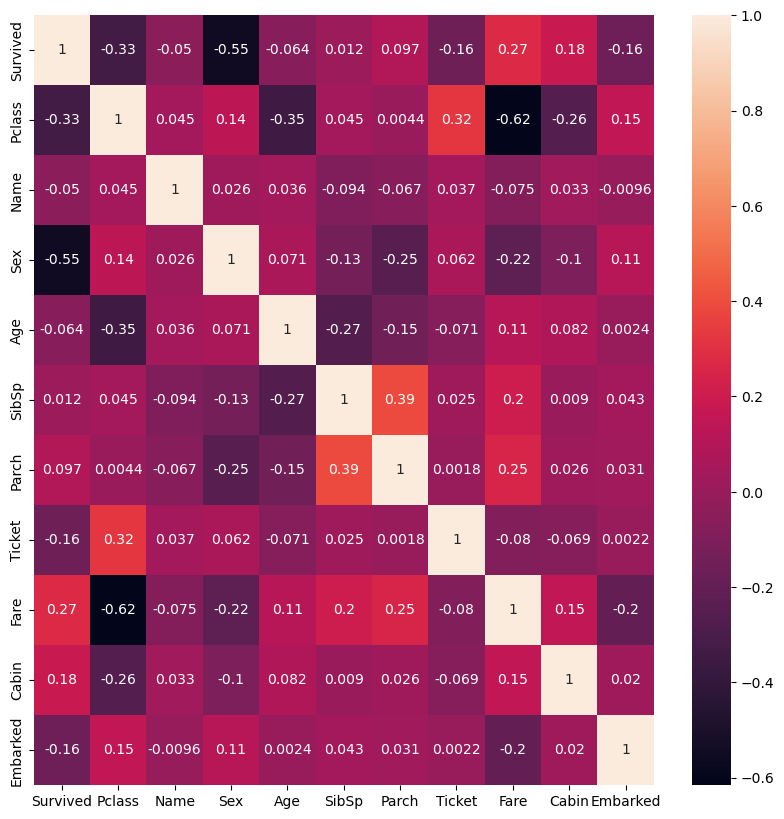

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))  #specify size of heatmap
sns.heatmap(train_data.corr(), annot = True)  # plot correlation matrix
plt.show()

Correlation matrix shows that Fare plays a vital role in deciding whether passenger survived or not 

# 3. Model Building:

# a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

We just need to run the ML algorithm(Logistic Regression) on past data (train_data) -> test our model performance on past data and then predict the list of passengers from the current data (test_data) who are survived or not .


# convert train_data into X and Y

In [98]:
X = train_data.values[:,1:] # define X (columns from Pclass to Embarked in training data)

In [99]:
X

array([[  3.    , 107.    ,   1.    , ...,   7.25  ,  45.    ,   2.    ],
       [  1.    , 188.    ,   0.    , ...,  71.2833,  79.    ,   0.    ],
       [  3.    , 351.    ,   0.    , ...,   7.925 ,  45.    ,   2.    ],
       ...,
       [  3.    , 411.    ,   0.    , ...,  23.45  ,  45.    ,   2.    ],
       [  1.    ,  80.    ,   1.    , ...,  30.    ,  58.    ,   0.    ],
       [  3.    , 218.    ,   1.    , ...,   7.75  ,  45.    ,   1.    ]])

In [100]:
Y = train_data.values[:,0] # define Y (only column: Survived from training data)

In [101]:
Y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [102]:
X.shape

(880, 10)

In [103]:
Y.shape

(880,)

# Data scaling on X using StandardScaler function 

data scaling is needed in X  because few columns have higher numeric values as compared to other columns which means that our model may get bias towards columns with higher numeric values. So, to avoid this scenario, data scaling is very useful here.
In data scaling, we scale the data in such a way so that values of each and every column will be in the range of -3 to +3.
We will scale our data using StandardScaler function which is available inside preprocessing sublibrary

In [104]:
from sklearn.preprocessing import StandardScaler # import StandardScaler func from preprocessing sublibrary
scaler = StandardScaler()     # StandardScaler func saved in var. scaler
scaler.fit(X)       # apply StandardScaler on X
X = scaler.transform(X)  # it will transform all values of X into the predefined range of -3 to +3 and again saved in var. X

In [105]:
X

array([[ 0.82853782, -1.30888015,  0.73746841, ..., -0.55891169,
        -0.29061367,  0.58568063],
       [-1.56986114, -0.99002513, -1.35599029, ...,  0.99558539,
         1.15328555, -1.94699236],
       [ 0.82853782, -0.34837863, -1.35599029, ..., -0.54252513,
        -0.29061367,  0.58568063],
       ...,
       [ 0.82853782, -0.11218973, -1.35599029, ..., -0.16563424,
        -0.29061367,  0.58568063],
       [-1.56986114, -1.41516515,  0.73746841, ..., -0.00662391,
         0.26146544, -1.94699236],
       [ 0.82853782, -0.87193069,  0.73746841, ..., -0.54677349,
        -0.29061367, -0.68065587]])

# split X and Y into 2 parts to get training and testing data.

80% training, 20% testing => means parameter test_size = 0.2

In [106]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10) # training and testing data (model can randomly take 10 rows at a time)

In [107]:
X_train

array([[-0.37066166, -0.85618476,  0.73746841, ..., -0.10372946,
        -0.29061367,  0.58568063],
       [ 0.82853782,  0.79320105,  0.73746841, ..., -0.53949058,
        -0.29061367,  0.58568063],
       [ 0.82853782, -1.03726291,  0.73746841, ..., -0.54677349,
        -0.29061367, -0.68065587],
       ...,
       [ 0.82853782, -0.80894698,  0.73746841, ..., -0.55941663,
        -0.29061367, -1.94699236],
       [ 0.82853782,  0.57275808,  0.73746841, ..., -0.46200764,
        -0.29061367, -1.94699236],
       [-1.56986114, -1.37580034, -1.35599029, ...,  2.55777081,
         1.49302654,  0.58568063]])

In [108]:
X_test

array([[-0.37066166,  0.81681994,  0.73746841, ..., -0.36955588,
        -0.29061367, -1.94699236],
       [ 0.82853782,  0.78139161,  0.73746841, ..., -0.543234  ,
        -0.29061367,  0.58568063],
       [-0.37066166,  0.05707898, -1.35599029, ...,  0.27447721,
        -0.29061367, -1.94699236],
       ...,
       [ 0.82853782,  0.21453825, -1.35599029, ..., -0.54677349,
        -0.29061367, -0.68065587],
       [ 0.82853782, -0.482219  , -1.35599029, ..., -0.35013477,
        -0.29061367,  0.58568063],
       [-0.37066166, -0.78139161,  0.73746841, ..., -0.41932247,
        -0.29061367,  0.58568063]])

In [109]:
Y_train

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [110]:
Y_test

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0.])

In [111]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(704, 10)
(176, 10)
(704,)
(176,)


# b. Train the model using the training data.

In [112]:
from sklearn.linear_model import LogisticRegression # import LogisticRegression function from linear_model sublib.
classifier = LogisticRegression()   # save this function in a variable classifier
classifier.fit(X_train,Y_train)   # fit function will train the model 


LogisticRegression()

In [113]:
Y_pred = classifier.predict(X_test) # predict the class of y for a given testing data (past data)
Y_pred

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0.])

Here, we predict two class of Y for a given testing data. These are: 0 and 1

0 means passenger will not survive

1 means passenger will survive

In [114]:
print(list(zip(Y_test,Y_pred))) #compare predicted class of Y with actual class of Y

[(0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.

# Let's predict the list of passengers from the current data(test_data), who survive or not

In [115]:
X1 = test_data.values[:,:]  # all rows, all columns i.e. entire testing dataset load into var. X1

In [116]:
X1

array([[  3.    , 204.    ,   1.    , ...,   7.8292,  14.    ,   1.    ],
       [  3.    , 397.    ,   0.    , ...,   7.    ,  14.    ,   2.    ],
       [  2.    , 267.    ,   1.    , ...,   9.6875,  14.    ,   1.    ],
       ...,
       [  3.    , 330.    ,   1.    , ...,   7.25  ,  14.    ,   2.    ],
       [  3.    , 378.    ,   1.    , ...,   8.05  ,  14.    ,   2.    ],
       [  3.    , 300.    ,   1.    , ...,  22.3583,  14.    ,   0.    ]])

In [117]:
X1.shape

(412, 10)

In [118]:
# data scaling of X1 
from sklearn.preprocessing import StandardScaler # import StandardScaler func from preprocessing sublibrary
scaler = StandardScaler()     # StandardScaler func saved in var. scaler
scaler.fit(X1)       # apply StandardScaler on X1
X1 = scaler.transform(X1)  # it will transform all values of X1 into the predefined range of -3 to +3 and again saved in var. X1

In [119]:
X1  # it's testing data from my current data(test_data)

array([[ 0.87634132, -0.01261206,  0.74873631, ..., -0.51532493,
        -0.35454335, -0.46592413],
       [ 0.87634132,  1.61013935, -1.33558369, ..., -0.53163021,
        -0.35454335,  0.7045682 ],
       [-0.3152515 ,  0.51709436,  0.74873631, ..., -0.47878356,
        -0.35454335, -0.46592413],
       ...,
       [ 0.87634132,  1.04680078,  0.74873631, ..., -0.52671424,
        -0.35454335,  0.7045682 ],
       [ 0.87634132,  1.45038662,  0.74873631, ..., -0.51098315,
        -0.35454335,  0.7045682 ],
       [ 0.87634132,  0.79455963,  0.74873631, ..., -0.22962658,
        -0.35454335, -1.63641647]])

Now, Logistic Regression model already trained 

In [120]:
Y_pred_new = classifier.predict(X1)
Y_pred_new

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1.

 The above list of passengers are from the current data(test_data), who survive or not
 
 0: indicates passenger not survive
 
 1: indicates passenger survive

# 4. Model Evaluation:

# a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred) #confusion matrix
print(cfm)
print("classification report")
print(classification_report(Y_test,Y_pred))  # classification report
acc = accuracy_score(Y_test,Y_pred)   # accuracy of the model
print("accuracy of model:",acc)

[[89 15]
 [18 54]]
classification report
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       104
         1.0       0.78      0.75      0.77        72

    accuracy                           0.81       176
   macro avg       0.81      0.80      0.80       176
weighted avg       0.81      0.81      0.81       176

accuracy of model: 0.8125


Confusion matrix is a matrix which represents the summary of the prediction results on a classification problem. In our testing data, out of 104 entries (89+15), model will tend to predict 89 values correct and 15 values wrong for class 0. Whereas out of 72 entries (18+54), model will tend to predict 54 values correct and 18 values wrong for class 1. 

recall is the accuracy of individual class.

For class 0, recall = 89/104  = 0.855 = 0.86

For class 1, recall = 54/72 = 0.75 

It means, for class 0 model is predicting 86% of the things correctly but for class 1 model is predicting 75% of the things correctly

Note: confusion matrix  

                       predicted class            0      1

                        actual class          0   TN     FP       OR     TP        FN
                             
                                              1   FN     TP              FP        TN 

TN(True Negative): if the actual value belongs to class 0, and model has predicted it correctly

FP(False Positive): if the actual value belongs to class 0, but model has predicted it incorrectly 

likewise FN(False Negative) , TP (True Positive)

Higher the accuracy of the model, better the performance of the model


accuracy score means overall performance of the model i.e. percentage of total correct predictions

accuracy score = (TN + TP) /(TN + FP + FN +TP)

accuracy score = (89 + 54) / (89 + 15 + 18 + 54) = 143 / 176 = 0.8125 = 81.25%


Precision means percentage of True positive predictions among all positive predictions made by the model. It is calculated as the ratio of TP to the sum of TP and false positives (FP).

For class 0 , precision = TP / (TP + FP) = 89 / (89+18) = 89/107 = 0.83

For class 1, precision = 54 / (54+15) = 54/69=0.78


F1 Score is a metric that balances precision and recall. It is calculated as the mean of precision and recall.

For class 0, F1 score = (0.83 + 0.86)/2  = 0.84

For class 1, F1 score = (0.78 + 0.75)/2  = 0.77

# Evaluate the performance of the model on the testing data using ROC-AUC score. Visualize the ROC curve.

In [122]:
X_test

array([[-0.37066166,  0.81681994,  0.73746841, ..., -0.36955588,
        -0.29061367, -1.94699236],
       [ 0.82853782,  0.78139161,  0.73746841, ..., -0.543234  ,
        -0.29061367,  0.58568063],
       [-0.37066166,  0.05707898, -1.35599029, ...,  0.27447721,
        -0.29061367, -1.94699236],
       ...,
       [ 0.82853782,  0.21453825, -1.35599029, ..., -0.54677349,
        -0.29061367, -0.68065587],
       [ 0.82853782, -0.482219  , -1.35599029, ..., -0.35013477,
        -0.29061367,  0.58568063],
       [-0.37066166, -0.78139161,  0.73746841, ..., -0.41932247,
        -0.29061367,  0.58568063]])

In [123]:
y_pred_proba = classifier.predict_proba(X_test) # predict the probability that given class of Y is 0 and 1 using logistic regression

In [124]:
y_pred_proba   # col 0 indicates class 0, col 1 indicates class 1

array([[0.65583957, 0.34416043],
       [0.92819508, 0.07180492],
       [0.08086451, 0.91913549],
       [0.78533651, 0.21466349],
       [0.34167383, 0.65832617],
       [0.28342389, 0.71657611],
       [0.90602728, 0.09397272],
       [0.38173042, 0.61826958],
       [0.95841061, 0.04158939],
       [0.31577737, 0.68422263],
       [0.16766683, 0.83233317],
       [0.49512578, 0.50487422],
       [0.34905695, 0.65094305],
       [0.82234528, 0.17765472],
       [0.21232123, 0.78767877],
       [0.20484329, 0.79515671],
       [0.87706852, 0.12293148],
       [0.06910239, 0.93089761],
       [0.23297513, 0.76702487],
       [0.15408126, 0.84591874],
       [0.5435388 , 0.4564612 ],
       [0.94814844, 0.05185156],
       [0.93598844, 0.06401156],
       [0.08669989, 0.91330011],
       [0.75707717, 0.24292283],
       [0.88114083, 0.11885917],
       [0.84372576, 0.15627424],
       [0.88361232, 0.11638768],
       [0.09189644, 0.90810356],
       [0.89058401, 0.10941599],
       [0.

In [125]:
y_pred_proba.shape 

(176, 2)

In [126]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]   # use model to predict probabability that given class of y is 1

In [127]:
y_pred_proba   # display all rows, col 1 i.e. display entire class 1

array([0.34416043, 0.07180492, 0.91913549, 0.21466349, 0.65832617,
       0.71657611, 0.09397272, 0.61826958, 0.04158939, 0.68422263,
       0.83233317, 0.50487422, 0.65094305, 0.17765472, 0.78767877,
       0.79515671, 0.12293148, 0.93089761, 0.76702487, 0.84591874,
       0.4564612 , 0.05185156, 0.06401156, 0.91330011, 0.24292283,
       0.11885917, 0.15627424, 0.11638768, 0.90810356, 0.10941599,
       0.88250472, 0.81702397, 0.97589072, 0.43009094, 0.13464316,
       0.71875867, 0.70305267, 0.06168563, 0.85726804, 0.88687131,
       0.68706063, 0.39024709, 0.85433187, 0.10383199, 0.07641004,
       0.35647138, 0.10683589, 0.04406103, 0.1417191 , 0.73980661,
       0.09507571, 0.95750441, 0.04192135, 0.83409434, 0.09022615,
       0.16005401, 0.25250892, 0.59983351, 0.69159222, 0.61847612,
       0.11877111, 0.93931265, 0.09669223, 0.12400556, 0.75323975,
       0.0985633 , 0.48417832, 0.28906448, 0.22587957, 0.70830282,
       0.22087679, 0.73349434, 0.03985298, 0.24402743, 0.08499

In [128]:
y_pred_proba.shape

(176,)

In [129]:
from sklearn.metrics import roc_auc_score, roc_curve # import these functions from metrics sublib.
auc = roc_auc_score(Y_test,y_pred_proba)  # calculate AUC score
print("AUC score:", auc)

AUC score: 0.8637820512820512


AUC score is close to 1 which means our model is better

Logistic Regression is a statistical method that we use to fit a regression model when the response variable is binary.
One way to quantify how well the logistic regression model does at classifying data is to calculate AUC, which stands for “area under curve.” The closer the AUC is to 1, the better the model.

a model with an AUC score of 0.5 is no better than a model that performs random guessing. 

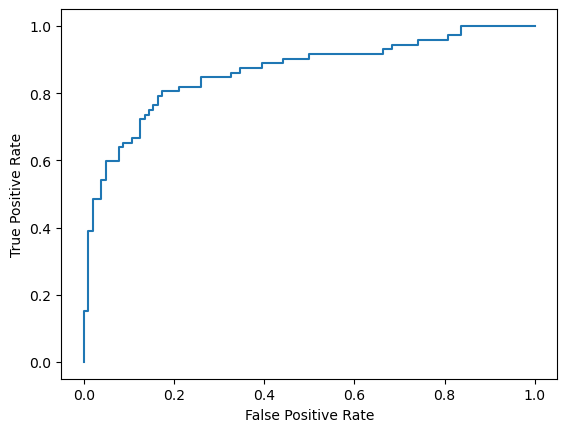

In [130]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba) # plot roc curve
plt.plot(fpr,tpr)  # line plot between false positive rate(fpr) and true positive rate(tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data

To assess how well a logistic regression model fits a dataset, we can look at the following two metrics:

Sensitivity: The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”

Specificity: The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”

One way to visualize these two metrics is by creating a ROC curve, which stands for “receiver operating characteristic” curve. This is a plot that displays the sensitivity and specificity of a logistic regression model.

we have to calculate the true positive rate(tpr) and the false positive rate(fpr) and create a ROC curve 

# 5. Interpretation:

# a. Interpret the coefficients of the logistic regression model.

As we know, Logistic regression is a method we can use to fit a regression model when the response variable is binary. 

β0, β1 are the coefficients of logistic regression 

p/ 1-p is odd's ratio = probability of success divided by probability of failure

When we fit a logistic regression model, the coefficients in the model output represent the change in the log odd's ratio which
is shown by the following equation:

loge (p /1-p)  = β0 + β1 x       

logit function = equation of linear regression 

it shows, while performing logistic regression, in the background we have linear regression running  and due to logit function, values are in the range of 0 to 1


Example: Suppose we would like to fit a logistic regression model to predict whether or not a student will pass a final exam
considering two features: height of the student and number of hours student study 


                         Coefficient Estimate	
               
        Intercept	              -1.34	

        Height       	          - 0.56	

       Number of hours      	   1.13


Here, β0 = -1.34

for Height,  β1 = - 0.56	

for study hours, β1 = 1.13

Since, β-value for no. of hours student study > β- value for height of the student which means no. of hours student study is more impactful and hence increases the chance of student passing the exam 



# b. Discuss the significance of features in predicting the target variable (survival probability in this case).

Example: Suppose we would like to fit a logistic regression model to predict whether or not a student will pass a final exam considering two features: height of the student and number of hours student study

                                p-value    

    Height                        0.07 

    Number of hours               0.02
    
    Assume, significance level (α) = 0.05 => it is the threshold value use to decide whether to reject the null hypothesis.
    
    p-value is the probability used as a measure of evidence against the null hypothesis.
    
    Null Hypothesis represent default assumption stating no effect or no change
    
    Null Hypothesis: It states there is no link between the two variables 
    
    p-value > α => it means, we will accept our null hypothesis 
    
    
We can  see that the p-value for height > α => it means, we accept our null hypothesis i.e. there is no link between height of student and student passing the exam. 
 
We can see that the p-value for number of hours student study < α => it means, we will reject our null hypothesis i.e. there is a significant link between no. of hours student study and passing the exam. 

# 6. Deployment with Streamlit:

Now, in order to use this model to predict other unknown data, we need to save it. We can save it by using pickle.

In [131]:
import pickle  #import pickle library
pickle_out = open("classifier.pkl", "wb") # create the pickle file named as classifier.pkl
pickle.dump(classifier, pickle_out) 
pickle_out.close()


after execution of above code line, classifier.pkl file will be saved in our local directory

We need to create front end web where by using streamlit library , we can able to access the model and as soon as we give the input, we will able to get the output.

Now we can get down to using Streamlit to deploy the model and for that, first install the streamlit lib.